##### 1. Problem Statement

- This project understands how the student's performance (test scores) is affected by different factors such as Gender, Ethinicity, parental level of Education, lunch before test and completion of test preparation course.

##### 2. Import required packages

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
# Load the dataset
df = pd.read_csv('./StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### 3. Data Cleaning

In [7]:
# Check for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no any missing values in the dataset.

In [8]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

There are no any duplacates data.

##### 4. Exploring data

In [9]:
# Check for unique values in each column

# for col in df.columns:
#     print(f"{col}: {df[col].nunique()} unique values")
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
#Replace the column names with more readable ones

df.columns =df.columns.str.replace(' ', '_')
df.columns =df.columns.str.replace('/', '_')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# Exploring unique values in categorical columns

print("Categories in 'gender' column:",end=' ')
print(df['gender'].unique())

print("\nCategories in 'race_ethnicity' column:",end=' ')
print(df['race_ethnicity'].unique())

print("\nCategories in 'parental_level_of_education' column:",end=' ')
print(df['parental_level_of_education'].unique())

print("\nCategories in 'lunch' column:",end=' ')
print(df['lunch'].unique())

print("\nCategories in 'test_preparation_course' column:",end=' ')
print(df['test_preparation_course'].unique())


Categories in 'gender' column: ['female' 'male']

Categories in 'race_ethnicity' column: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental_level_of_education' column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' column: ['standard' 'free/reduced']

Categories in 'test_preparation_course' column: ['none' 'completed']


Dataset Information

* gender : ['female' , 'male']
* race_ethnicity : ['group A' , 'group B' , 'group C' , 'group D' , 'group E']
* parental_level_of_ethnicity : ["bachelor's degree" ,  "some college" , "master's degree" , "associate's degree"
 'high school' 'some high school']
* lunch: ['standard' , 'free/reduced'] 
    * Types of lunch before exam 
* test_preparation_course: ['none' , 'completed']
    * Whether test preparation course is completed or not 
* math score: Ranging from 0 to 100
* reading score: Ranging from 17 to 100
* writing score: Ranging from 10 to 100

In [12]:
# Adding a new column for total score and average score
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average_score'] = df['total_score'] / 3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
# reading_full = df[df['reading_score'] == 100]['lunch'].count()
reading_full = (df['reading_score'] == 100).sum()
reading_full
# no of students who scored 100 in reading

np.int64(17)

 ##### 4.1 Histogram

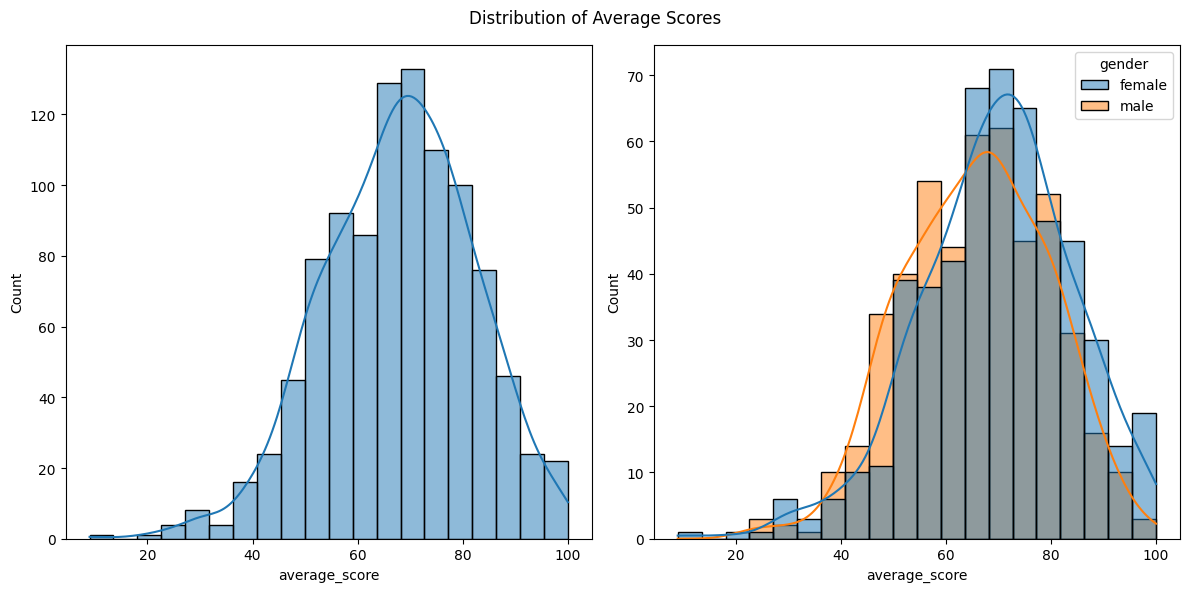

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='average_score', bins=20, kde=True)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='average_score', bins=20, kde=True, hue='gender')

plt.suptitle('Distribution of Average Scores')
plt.tight_layout()
plt.show()



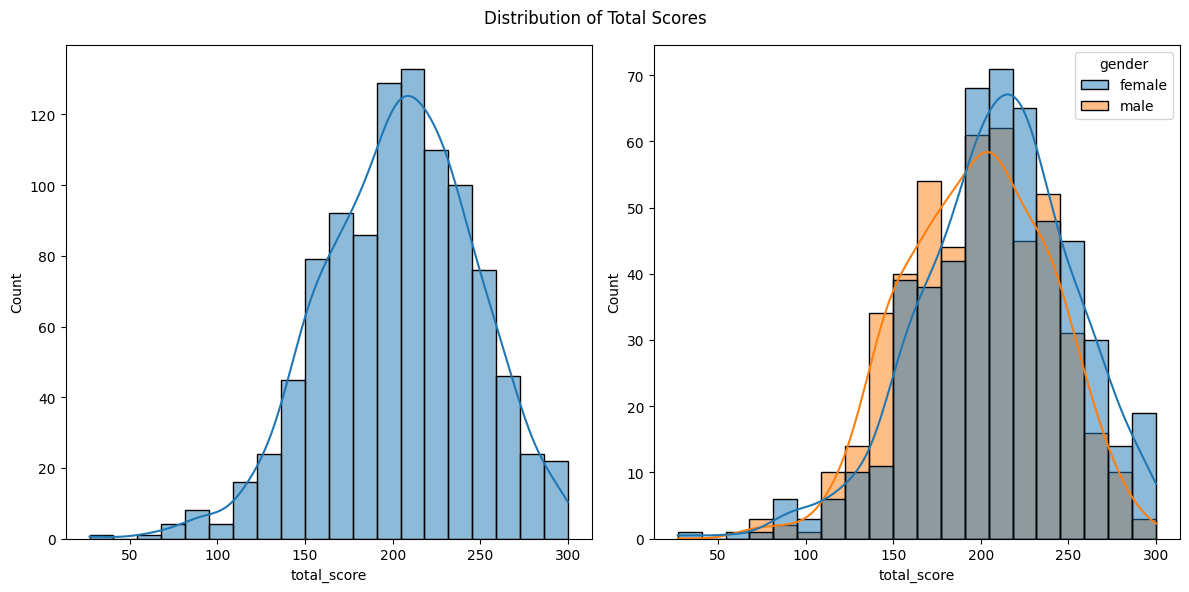

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='total_score', bins=20, kde=True)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='total_score', bins=20, kde=True, hue='gender')

plt.suptitle('Distribution of Total Scores')
plt.tight_layout()
plt.show()

Insights:
- Female students tends to perform well then male students.

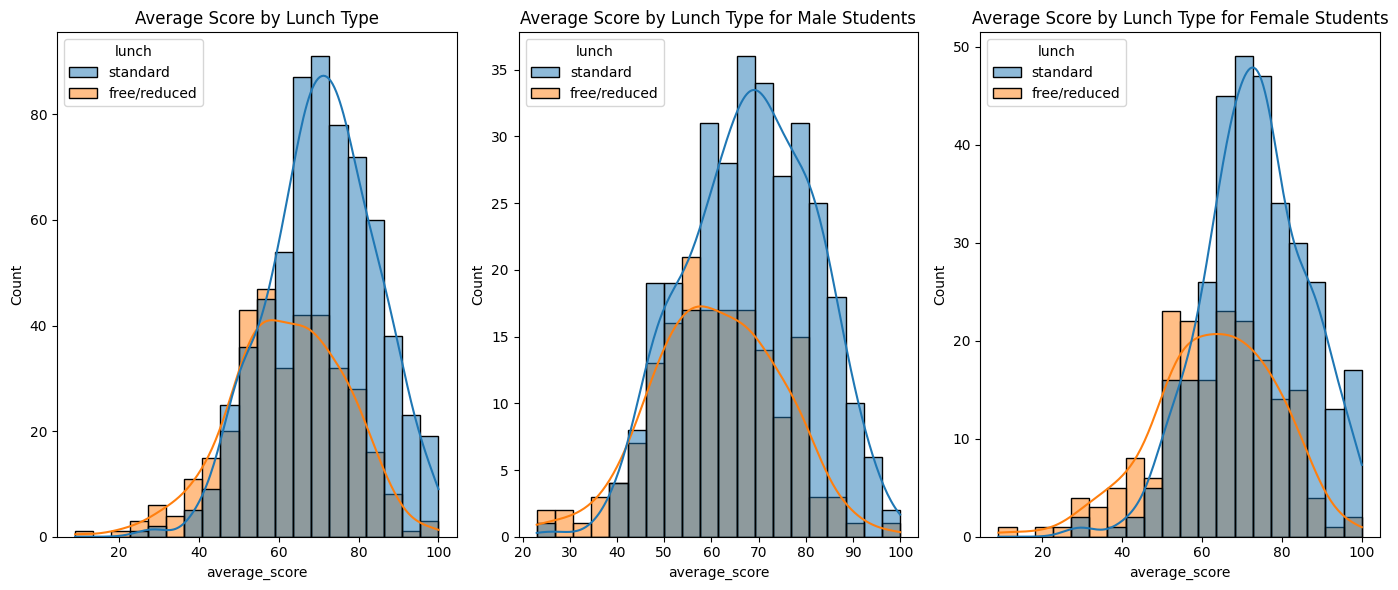

In [16]:
plt.figure(figsize=(14, 6))

plt.subplot(131)
sns.histplot(data=df, x='average_score', bins=20, kde=True, hue='lunch')
plt.title('Average Score by Lunch Type')

plt.subplot(132)
sns.histplot(data=df, x=df[df.gender == 'male']['average_score'], bins=20, kde=True, hue='lunch')
plt.title('Average Score by Lunch Type for Male Students')

plt.subplot(133)
sns.histplot(data=df, x=df[df.gender == 'female']['average_score'], bins=20, kde=True, hue='lunch')
plt.title('Average Score by Lunch Type for Female Students')

plt.tight_layout()
plt.show()

Insights:
- Lunch type effects the performance in the exam. Standard lunch helps to perform well in exam both in the case of male and female students.

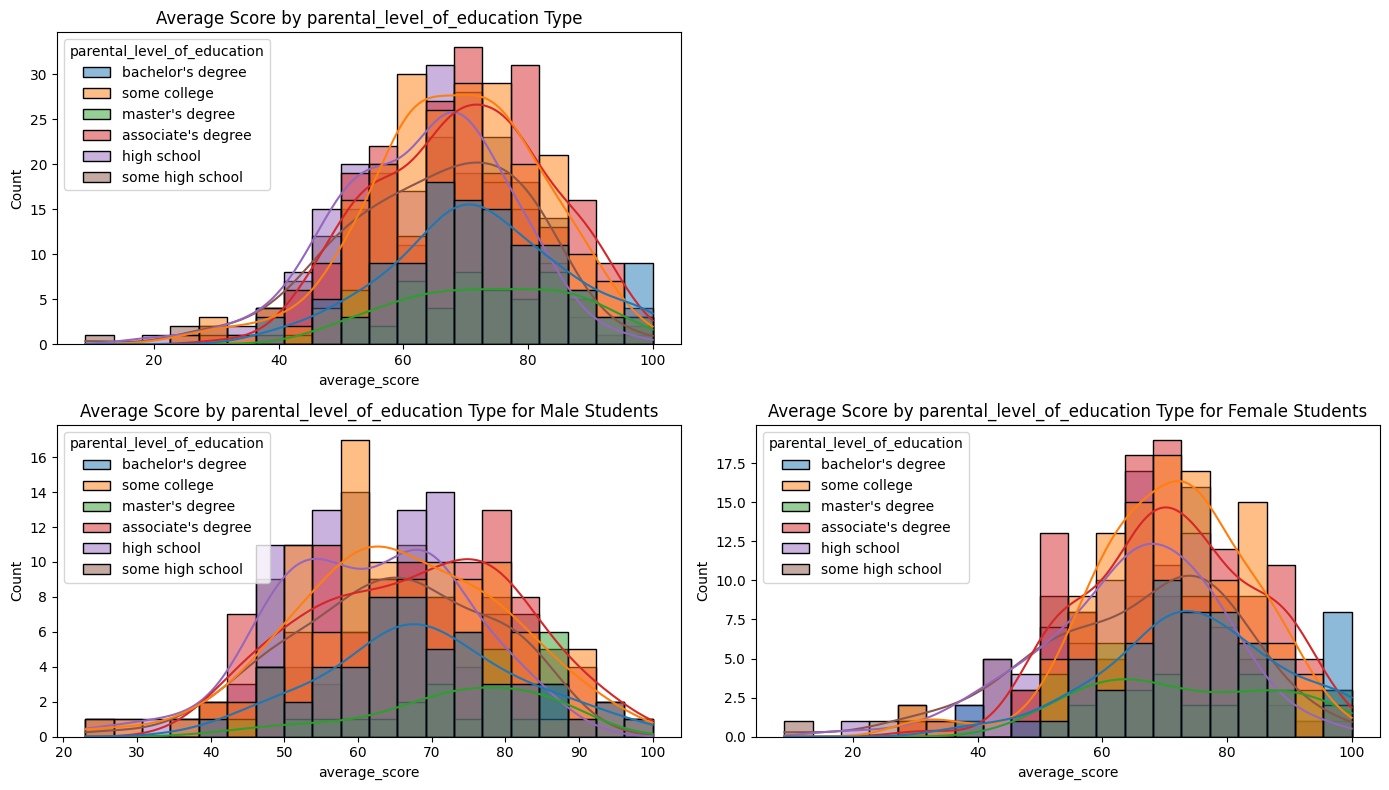

In [17]:
plt.figure(figsize=(14, 8))

plt.subplot(221)
sns.histplot(data=df, x='average_score', bins=20, kde=True, hue='parental_level_of_education')
plt.title('Average Score by parental_level_of_education Type')

plt.subplot(223)
sns.histplot(data=df, x=df[df.gender == 'male']['average_score'], bins=20, kde=True, hue='parental_level_of_education')
plt.title('Average Score by parental_level_of_education Type for Male Students')

plt.subplot(224)
sns.histplot(data=df, x=df[df.gender == 'female']['average_score'], bins=20, kde=True, hue='parental_level_of_education')
plt.title('Average Score by parental_level_of_education Type for Female Students')

plt.tight_layout()
plt.show()

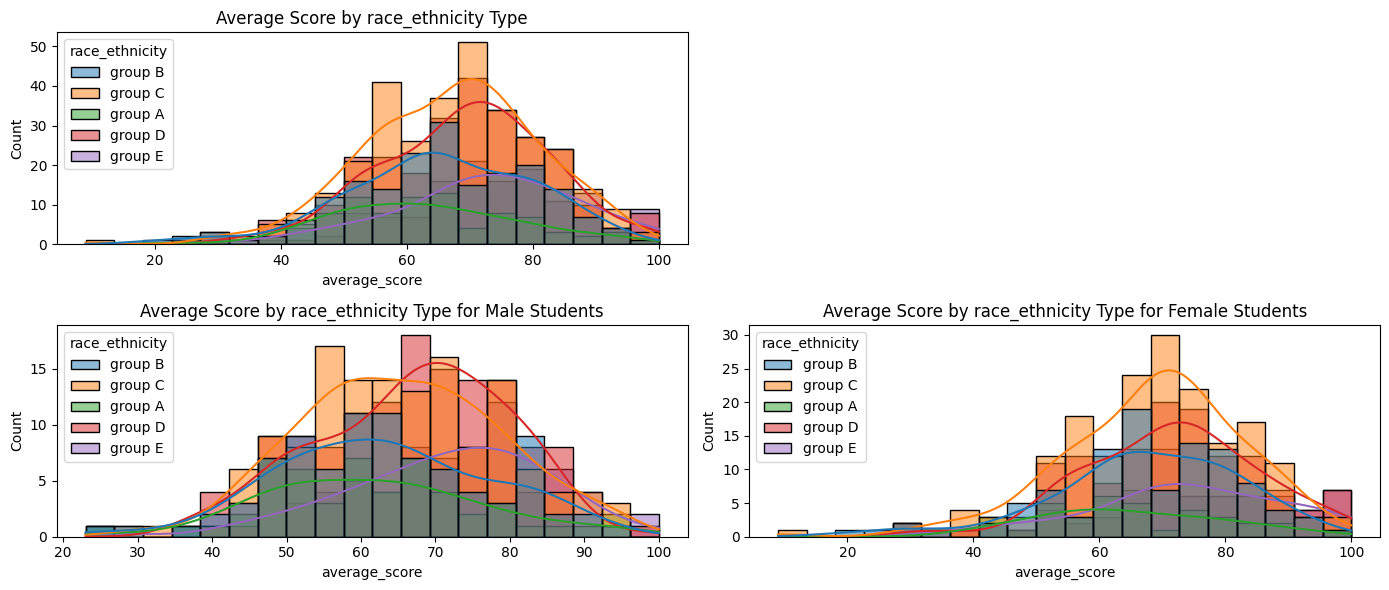

In [18]:
plt.figure(figsize=(14, 6))

plt.subplot(221)
sns.histplot(data=df, x='average_score', bins=20, kde=True, hue='race_ethnicity')
plt.title('Average Score by race_ethnicity Type')

plt.subplot(223)
sns.histplot(data=df, x=df[df.gender == 'male']['average_score'], bins=20, kde=True, hue='race_ethnicity')
plt.title('Average Score by race_ethnicity Type for Male Students')

plt.subplot(224)
sns.histplot(data=df, x=df[df.gender == 'female']['average_score'], bins=20, kde=True, hue='race_ethnicity')
plt.title('Average Score by race_ethnicity Type for Female Students')

plt.tight_layout()
plt.show()

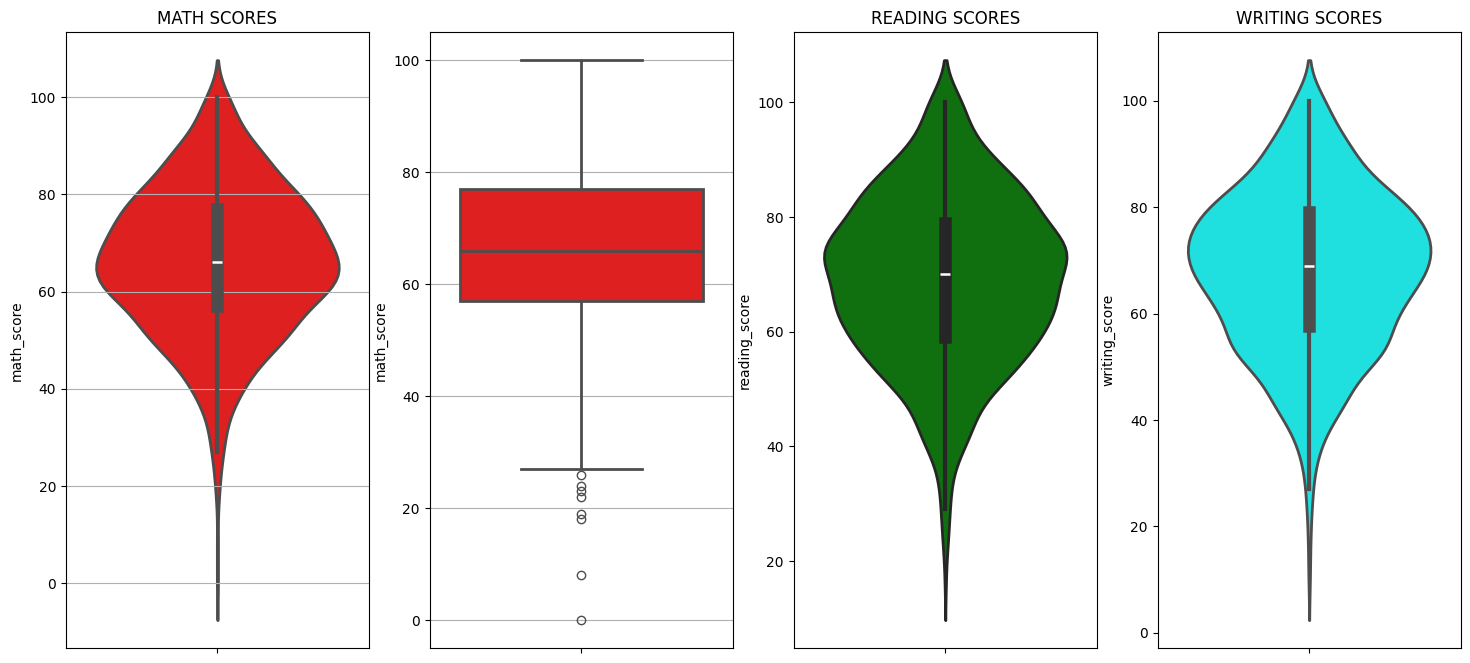

In [19]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
plt.grid()
sns.violinplot(y='math_score',data=df,color='red',linewidth=2)
plt.subplot(1, 4, 2)
plt.grid()
sns.boxplot(y='math_score',data=df,color='red',linewidth=2)
plt.subplot(1, 4, 3)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=2)
plt.subplot(1, 4, 4)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='cyan',linewidth=2)
plt.show()

##### 4.2 Multivariate analysis using pieplot

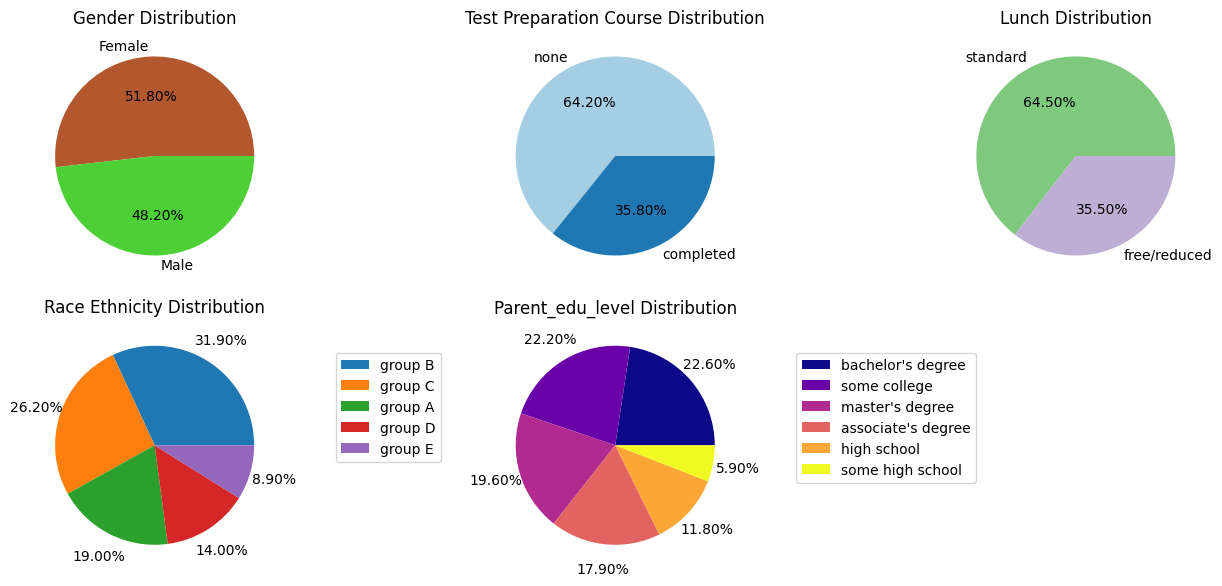

In [20]:
import random


plt.figure(figsize=(12, 6))

size=df['gender'].value_counts()
labels='Female','Male'
colors= [(random.random(),random.random(),random.random()) for _ in labels]  # generate random colors

plt.subplot(2, 3, 1)
plt.pie(x=size,colors=colors,labels=labels, autopct='%1.2f%%')
plt.title('Gender Distribution')

plt.subplot(2, 3, 2)
colors = plt.get_cmap("Paired").colors
plt.pie(x=df['test_preparation_course'].value_counts(),colors=colors,labels=df['test_preparation_course'].unique(), autopct='%1.2f%%')
plt.title('Test Preparation Course Distribution')

plt.subplot(2, 3, 3)
colors = [(random.random(),random.random(),random.random()) for _ in labels]
colors = plt.get_cmap("Accent").colors

plt.pie(x=df['lunch'].value_counts(),colors=colors,labels=df['lunch'].unique(), autopct='%1.2f%%')
plt.title('Lunch Distribution')

plt.subplot(234)
plt.pie(x= df['race_ethnicity'].value_counts(), autopct='%1.2f%%',pctdistance=1.25)
plt.legend(bbox_to_anchor=(1.2, 0.9),labels=list(df['race_ethnicity'].unique()))
plt.title('Race Ethnicity Distribution')

plt.subplot(235)
cmap = plt.get_cmap("plasma")
labels=df['parental_level_of_education'].unique()
colors = cmap(np.linspace(0, 1, len(labels)))
plt.pie(x= df['parental_level_of_education'].value_counts(),colors=colors, autopct='%1.2f%%',pctdistance=1.25)
plt.legend(bbox_to_anchor=(1.2, 0.9),labels=labels)
plt.title('Parent_edu_level Distribution')

plt.tight_layout()
plt.show()

Insights:
1. Number of male and female students are almost equal.
2. Number of students who haven't taken test preparation course are greater.
3. No. of students having standard lunch before exam are greater than free/reduced lunch.
4. Larger no. of students belongs from group B race ethnicity and fewer from group E.
5. Larger no. of student's parental education level is "some college" or "Bachelors degree" whereas fewer is "some high school".

In [38]:
gender_grouped = df.groupby(['gender']).mean(numeric_only=True)
gender_grouped

    

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


/tmp/ipykernel_4640/827462696.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
/tmp/ipykernel_4640/827462696.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
/tmp/ipykernel_4640/827462696.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'

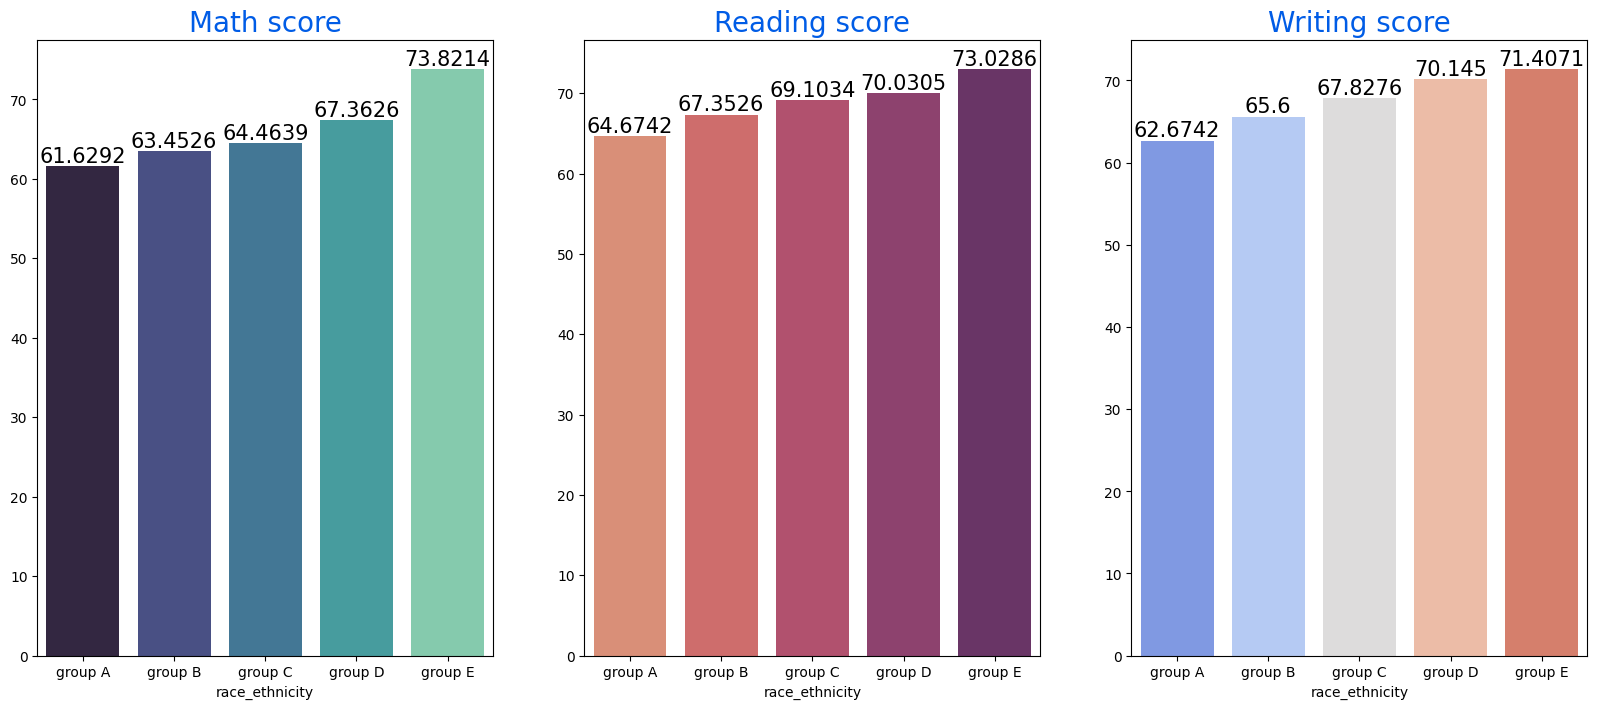

In [41]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)